<b> Car price prediction using Multivariate Linear Regression with OneHotEncoding

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


Check if LinearRegression is applicable

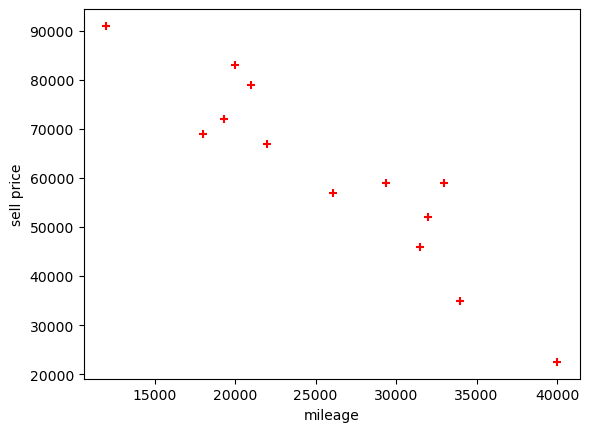

In [7]:
%matplotlib inline
plt.xlabel('mileage')
plt.ylabel('sell price')
plt.scatter(df['Sell Price($)'], df['Mileage'], color='red', marker='+')


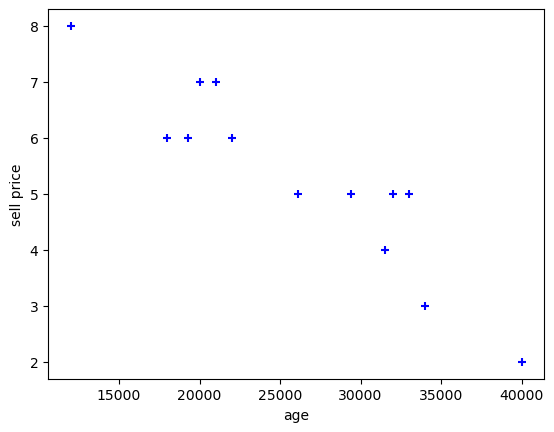

In [9]:
%matplotlib inline
plt.xlabel('age')
plt.ylabel('sell price')
plt.scatter(df['Sell Price($)'], df['Age(yrs)'], color='blue', marker='+')

One-hot-encoding using Pandas and NumPy

In [12]:
dummies = pd.get_dummies(df["Car Model"])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [13]:
merged = pd.concat([df, dummies], axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [19]:
final = merged.drop(["Car Model", "Mercedez Benz C class"], axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [23]:
model = LinearRegression()

Avoid dummy variable trap. Drop one of the dummy variables column.

In [29]:
X = final.drop(["Sell Price($)"], axis='columns').values
X

array([[69000,     6,     0,     1],
       [35000,     3,     0,     1],
       [57000,     5,     0,     1],
       [22500,     2,     0,     1],
       [46000,     4,     0,     1],
       [59000,     5,     1,     0],
       [52000,     5,     1,     0],
       [72000,     6,     1,     0],
       [91000,     8,     1,     0],
       [67000,     6,     0,     0],
       [83000,     7,     0,     0],
       [79000,     7,     0,     0],
       [59000,     5,     0,     0]], dtype=int64)

In [30]:
y = final["Sell Price($)"].values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [31]:
model.fit(X, y)

LinearRegression()

In [35]:
model.predict([[45000, 4, 0, 0]]) # Mercedez Benz 4 years old with mileage 45000

array([36991.31721061])

In [34]:
model.predict([[86000, 7, 0, 1]]) # BMW 7 years old with milage 86000

array([11080.74313219])

In [37]:
model.score(X, y)

0.9417050937281083

One-hot-encoding using ScikitLearn

In [38]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
dfle = df
dfle["Car Model"] = le.fit_transform(dfle["Car Model"])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [49]:
X = dfle[["Car Model", "Mileage", "Age(yrs)"]].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [51]:
y = dfle[["Sell Price($)"]].values
y

array([[18000],
       [34000],
       [26100],
       [40000],
       [31500],
       [29400],
       [32000],
       [19300],
       [12000],
       [22000],
       [20000],
       [21000],
       [33000]], dtype=int64)

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')

In [62]:
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [63]:
X = X[:,1:]
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [64]:
model.fit(X , y)

LinearRegression()

Results are the same as in cells: 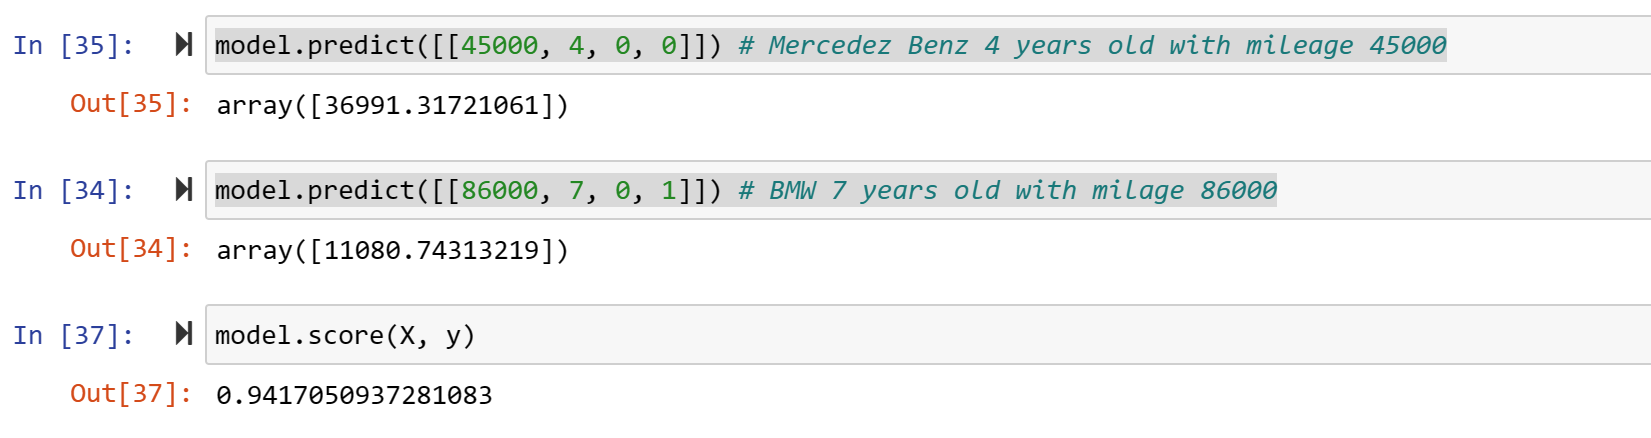

In [66]:
model.predict([[0, 1, 45000, 4]]) # Mercedez Benz 4 years old with mileage 45000

array([[36991.31721062]])

In [67]:
model.predict([[1, 0, 86000, 7]]) # BMW 7 years old with milage 86000

array([[11080.74313219]])

In [68]:
model.score(X,y)

0.9417050937281083